# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type - correction: has the name of the type as the index.
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

#total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.name="Total Rides"
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: Total Rides, dtype: int64

In [4]:
# 2. Get the total drivers for each city type - correction: has the name of the type as the index.
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.name="Total Drivers"
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: Total Drivers, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type- correction: has the name of the type as the index.
fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_count.name="Total Fares"
fares_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Total Fares, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
ride_ave_fare = (pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"])
ride_ave_fare.name="Average Fare per Ride"
ride_ave_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: Average Fare per Ride, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
driver_ave_fare = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
driver_ave_fare.name="Average Fare per Driver"
driver_ave_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: Average Fare per Driver, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame.

#pyber_summary_df = pd.DataFrame()


pyber_summary_df = pd.merge(ride_count, driver_count, on="type", how="left")
pyber_summary_df = pd.merge(pyber_summary_df, fares_count, on="type", how="left")
pyber_summary_df = pd.merge(pyber_summary_df, ride_ave_fare, on="type", how="left")
pyber_summary_df = pd.merge(pyber_summary_df, driver_ave_fare, on="type", how="left")

pyber_summary_df
#.dtypes


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

#pyber_summary_df["Total Fares"].map("$ {:,.2}".format)
#pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("$ {:,.2}".format)

#pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("$ {:,.2}".format)
#pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("$ {:,.2}".format)


#pd.options.display.int_format = '${:,f}'.format

pd.options.display.float_format = '${:,.2f}'.format
#print('\nResult :\n', pyber_summary_df) 

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
#pyber_summary_df = pd.read.pyber_summary_df
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [12]:
# 2. (step 9) Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_summary_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_summary_date_df

type   date               
Rural  2019-01-01 09:45:36   $43.69
       2019-01-02 11:18:32   $52.12
       2019-01-03 19:51:01   $19.90
       2019-01-04 03:31:26   $24.88
       2019-01-06 07:38:40   $47.33
                              ...  
Urban  2019-05-08 04:20:00   $21.99
       2019-05-08 04:39:49   $18.45
       2019-05-08 07:29:01   $18.55
       2019-05-08 11:38:35   $19.77
       2019-05-08 13:10:18   $18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. (step 10) Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_summary_date_df = pyber_summary_date_df.reset_index()
pyber_summary_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [14]:
# 4. (step 11) Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_date = pyber_summary_date_df.pivot(index="date", columns = "type", values = "fare")
pyber_pivot_date

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-05-08 04:20:00,$nan,$nan,$21.99
2019-05-08 04:39:49,$nan,$nan,$18.45
2019-05-08 07:29:01,$nan,$nan,$18.55


In [15]:
# 5. (step 12) Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_pivot_date_df = pyber_pivot_date.loc['2019-01-01':'2019-04-29']
pyber_pivot_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-04-28 14:28:36,$nan,$nan,$11.46
2019-04-28 16:29:16,$nan,$nan,$36.42
2019-04-28 17:26:52,$nan,$nan,$31.43


In [17]:
# 6. (step 13) Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_pivot_date_df.index = pd.to_datetime(pyber_pivot_date_df.index)

In [18]:
# 7. (step 14)  Check that the datatype for the index is datetime using 
#df.info()
pyber_pivot_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. (step 15)  Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_resample_df = pyber_pivot_date_df.resample("W").sum()
pyber_resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


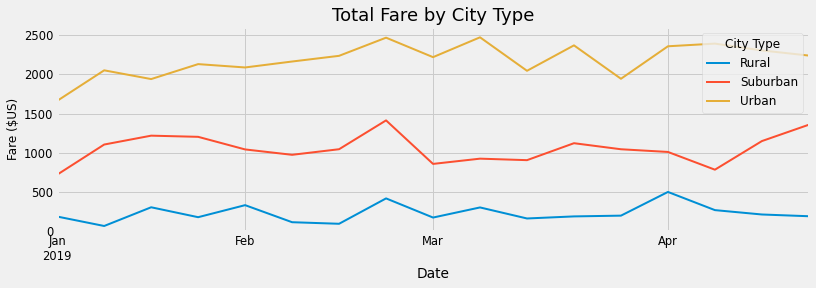

In [20]:
# 8. (step 16) Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import matplotlib as mpl
# font size change from default
mpl.rcParams['font.size'] =11.5

# plotting using df.plot()
pyber_resample_df.plot(figsize=(12,3.5), lw=2)

# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare ($US)", fontsize=12)
#Set the y limit between 0 and 2600.
plt.ylim(0, 2600)
# Create a title.
plt.title("Total Fare by City Type", fontsize=18)
lgnd = plt.legend(fontsize="12", mode="Expanded", loc="upper right", title="City Type")
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/PyBer_fare_summary.png")


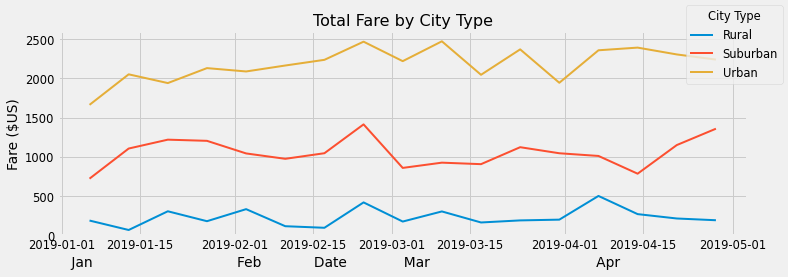

In [21]:
# 8. (step 16) ALSO - Using the object-oriented interface method, plot the resample DataFrame

fig, ax = plt.subplots(figsize=(11 ,3.5))

ax.plot(pyber_resample_df, lw=2, label='City Type')
# color='lime', marker='d',markersize=6, linestyle='-'

# Add the title, grid, legend.
ax.set_title("Total Fare by City Type", fontsize=16)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
fig.legend(['Rural', 'Suburban', 'Urban'], loc="upper right", title="City Type")

# Create labels for the x and y axes.
ax.set_xlabel(" Jan                                 Feb            Date             Mar                                      Apr                           ")
#ax.text(.1, .1, "Trial Text Months", fontsize=10, ha="left")
ax.set_ylabel("Fare ($US)")

# Set the y limit between 0 and 2600.
ax.set_ylim(0, 2600)

# Save the figure.
#plt.savefig("analysis/PyBer_fare_summary2.png")
plt.show()